В зависимости от количества признаков, описывающих объект, можно выделить две разновидности визуализации: 2D и 3D.

Если объект описывается двумя признаками, например рост и вес, эти значения легко распределить по осям X и Y. Если прибавляется ещё один признак, понадобится дополнительная ось Z, и график будет трёхмерным. В зависимости от алгоритма кластеризации мы можем просто визуализировать кластеры или же нарисовать дендрограмму.

В данном юните мы рассмотрим следующие способы визуализации:

* диаграмма рассеяния для двухмерного и трёхмерного случаев;
* Convex Hull, или выпуклая оболочка;
* дендрограмма;
* Clustergram.

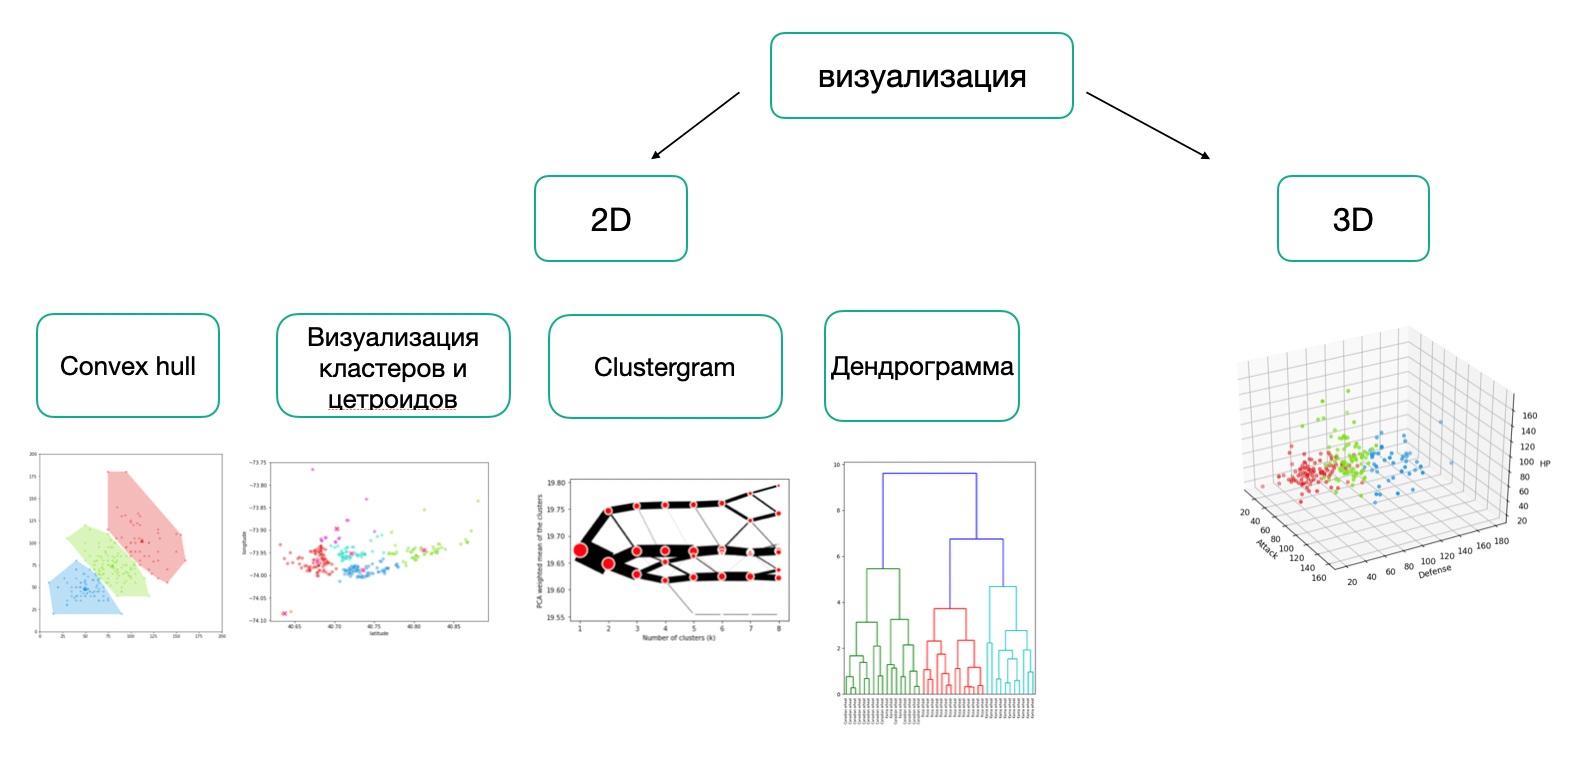

In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

Прочитаем данные Airbnb по жилью, которое можно арендовать. 

In [50]:
df = pd.read_csv("data/airbnb.csv")

In [51]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Нас интересует ширина и долгота арендного жилья, и стоимость аренды. 
Рассмотрим, кластеризацию по 2 признакам, а именно, выделим группы жилья по локации.
А для 3D признака еще добавим к текущим признакам цену и рассмотрим, как локация влияет на цену, визуализируем результаты.

<AxesSubplot: xlabel='latitude', ylabel='longitude'>

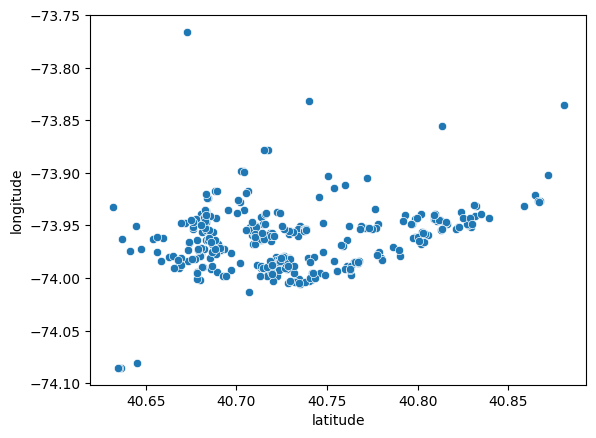

In [52]:
sns.scatterplot(x=df.latitude, y=df.longitude)

In [53]:
# инициализируем k-means кластеризацию с 6 кластерами
kmeans_clustering = KMeans(n_clusters=6)

# обучим k-means модель кластеризации на данных о широте и долготе, сохраним данные о кластерах для этих данных в predictions
predictions = kmeans_clustering.fit_predict(df[['latitude', 'longitude']])

# сохраним предсказания в колонку clusters датафрейма
df["clusters"] = predictions

d:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [54]:
# с помощью метода cluster_centers_ найдем координаты центроидов кластеров, сохраним их в список centroids
centroids = kmeans_clustering.cluster_centers_

# для 6 кластеров сохраним в отдельные списоки значения координат x и y
centroids_x = [i[0] for i in centroids]
centroids_y = [i[1] for i in centroids]

# зададим цвета для разных кластеров
colors = ['#DF2020', '#81DF20', '#2095DF', '#DF20C8', '#20DFC5', '#DF8520']

# создадим пустые словари, для того, чтобы потом соотнести координаты x и у центроидов разных кластеров, а также цвета 
centroids_x_dict = {}
centroids_y_dict = {}
colors_dict = {}

# итерируемся 6 раз, так как у нас 6 кластеров
for i in range(6):
    # сохраняем в словарь номер кластера в качестве ключа, значение координаты x центроида в качестве значения
    centroids_x_dict[i] = centroids_x[i]
    # сохраняем в словарь номер кластера в качестве ключа, значение координаты y центроида в качестве значения
    centroids_y_dict[i] = centroids_y[i]
    # сохраняем в словарь номер кластера в качестве ключа, значение цвета в качестве значения
    colors_dict[i] = colors[i]

Создадим новые столбцы (cen_x, cen_y, color) в датафрейме. В зависимости от того, какое значение в ячейке clusters в ячейке cen_x, cen_y и color будут разные значения. Если кластер 0, то в cen_x и cen_y будут координаты центроида нулевого кластера и цвет нулевого кластера. 

In [55]:
df['cen_x'] = df.clusters.map(centroids_x_dict) 
df['cen_y'] = df.clusters.map(centroids_y_dict)
df['color'] = df.clusters.map(colors_dict)

In [56]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,clusters,cen_x,cen_y,color
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,0,40.677937,-73.967837,#DF2020
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,3,40.735543,-73.988864,#DF20C8
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,1,40.812241,-73.943805,#81DF20
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,0,40.677937,-73.967837,#DF2020
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,1,40.812241,-73.943805,#81DF20


## Визуализация кластеров

<AxesSubplot: xlabel='latitude', ylabel='longitude'>

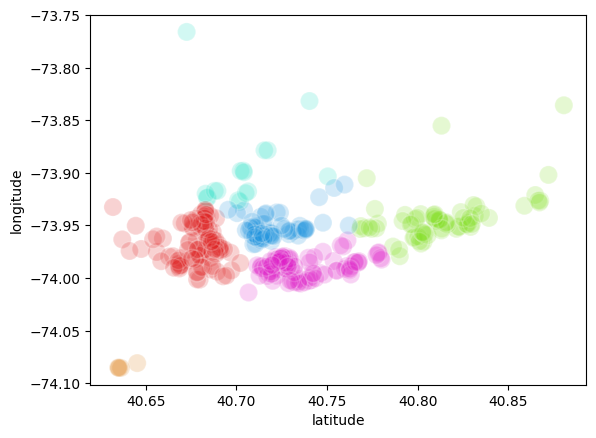

In [57]:
sns.scatterplot(x=df.latitude, y=df.longitude, c=df.color, alpha=0.2, s=170)

## Визуализация центроидов 

<AxesSubplot: xlabel='latitude', ylabel='longitude'>

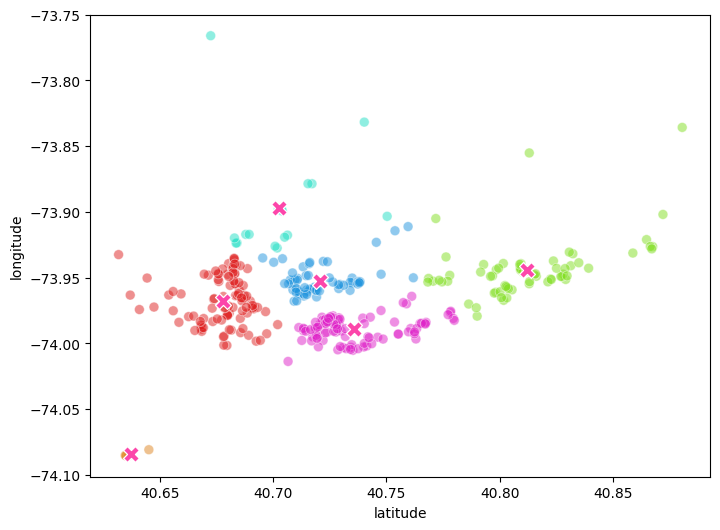

In [58]:
fig, axes = plt.subplots(figsize=(8, 6))

# визуализируем элементы датасета
# параметр c отвечает за то, что у элемента в зависимости от того, какому кластеру он принедлежит будет свой цвет
# s ответчает за размер объектов на графике, alpha отвечает за прозрачность точек
sns.scatterplot(x=df.latitude, y=df.longitude, c=df.color, s=50, alpha=0.5)
# визуализируем центроиды, их отметим на графике крестиком (marker="X") и зададим им розовый цвет 
sns.scatterplot(x=centroids_x, y=centroids_y, marker="X", c=['#FC46AA'], s=130)

## Convex Hull

Выпуклая оболочка (Convex Hull) множества точек — это такое выпуклое множество точек, в котором лежат все точки фигуры.

Визуализация Convex Hull помогает понять, насколько получившиеся кластеры крупные и разнообразные. Если все элементы кластера похожи друг на друга, площадь выпуклой оболочки будет маленькой, в противном случае — наоборот. Также на данной диаграмме хорошо заметны выбросы в данных. Выбросы находятся далеко от основных элементов кластера, а значит площадь выпуклой оболочки получается большой.

Для построения выпуклой оболочки для каждого кластера воспользуемся библиотекой scipy и модулем ConvexHull.
ConvexHull на вход принимает значения признаков объектов, для которых нужно построит выпуклую оболочку. 
Индексы точек из points, которые образуют вершины выпуклой оболочки можно получить с помощью метода vertices:


points = np.array([[ 40.64524, -74.08088], [ 40.63536, -74.08537], [ 40.63627, -74.08543], [ 40.63518, -74.08546], [ 40.63481, -74.08519]])
hull = ConvexHull(points)
hull.vertices

И мы получим списк из значений координат [0, 4, 3, 2]
После этого мы можем найти координаты этих точек из списка points.

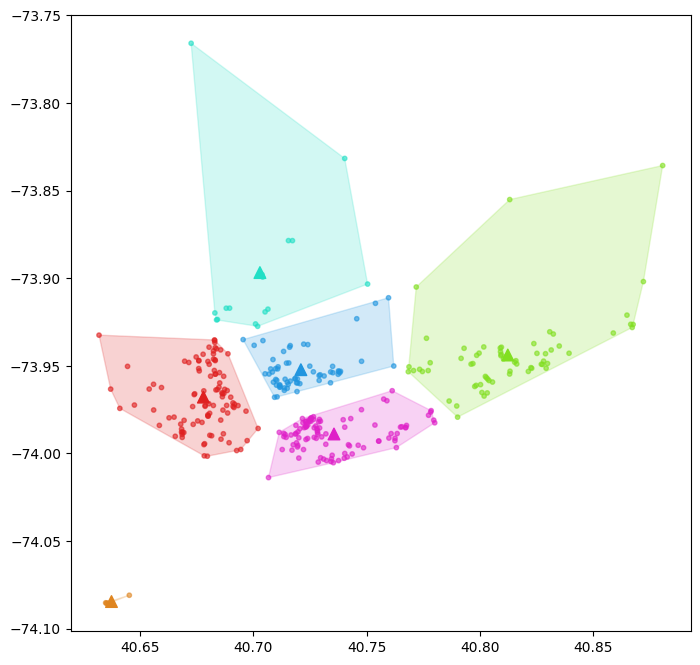

In [59]:
from scipy.spatial import ConvexHull 
import numpy as np

fig, ax = plt.subplots(1, figsize=(8,8))

# визуализируем объекты кластеров и центроиды
plt.scatter(df.latitude, df.longitude, c=df.color, alpha = 0.6, s=10)
plt.scatter(centroids_x, centroids_y, marker='^', c=colors, s=70)

# найдем уникальные значения кластеров и проитерируемся по каждому кластеру
for i in df.clusters.unique():
    # запишем в points значения признаков широты и долготы принадлежащие i-му кластеру
    points = df[df.clusters == i][['latitude', 'longitude']].values
 
    hull = ConvexHull(points)
    
    # запишем координаты оболочки по оси x. Из hull.vertices мы узнаем индексы элементов, входящих в оболочку
    # так как оболочка должна быть замкнутой, то в конце добавляем еще раз нулевой элемент
    x_hull = np.append(points[hull.vertices, 0], points[hull.vertices, 0][0]) 
    y_hull = np.append(points[hull.vertices, 1], points[hull.vertices, 1][0]) 
    
    # рисуем оболочку и заливаем ее таким же цветом как и объекты кластера
    plt.fill(x_hull, y_hull, alpha=0.2, c=colors[i])


## Дендрограммы 

Данный способ визуализации необходим, если мы хотим визуализировать результаты иерархической кластеризации.

Из дендрограммы можно вынести много полезной информации. На дендрограмме можно:

* наблюдать, как работал алгоритм: как объединялись (или разбивались) кластеры;
* понять, насколько похожи соседние кластеры между собой;
* предположить, какое количество кластеров можно было бы выбрать для кластеризации.

In [60]:
# импортируем алгомеративную кластеризацию из sklearn
from sklearn.cluster import AgglomerativeClustering

# запускаем агломеративную кластеризацию
agglomerative_clustering = AgglomerativeClustering(n_clusters=6, linkage='single')

# обучаем модель
predictions_ag_model = agglomerative_clustering.fit_predict(df[['latitude', 'longitude']])

Как мы уже знаем, результаты иерархической кластеризации можно представить в виде дендрограммы. Теперь научимся рисовать дендрограммы с предсказаниями. Для этого нам понадобится библиотека scipy и модули dendrogram и linkage.

linkage - это способ подсчета расстояния между двумя кластерами.

В переменной method можно задать разные способы подсчета рассчета расстояния: single, complete, average, weighted, centroid, median, ward.

Функция dendrogram строит дендрограмму, основываясь на информацию о расстоянии объектов, полученную из функции linkage, данная информация позволит строить ветви дендрограммы разной высоты.
Рассмотрим одни из наиболее важных переменных, которые принимает функция dendrogram:
- параметр Z - расстояния до объектов кластеров, полученные из функции linkage;
- orientation - ориентация дендрограммы. Данный параметр может принимать значения top, bottom, left, right;
- labels - список с предсказаниями, к какому кластеру какой объект относится
- distance_sort - определяет в каком порядке будут визуализированы кластеры. ascending или True означает, что сначала отрисовывается пара кластеров с наибольшим расстоянием между ними. descending или False означает, что сначала отрисовывается пара кластеров с минимальным расстоянием между ними.


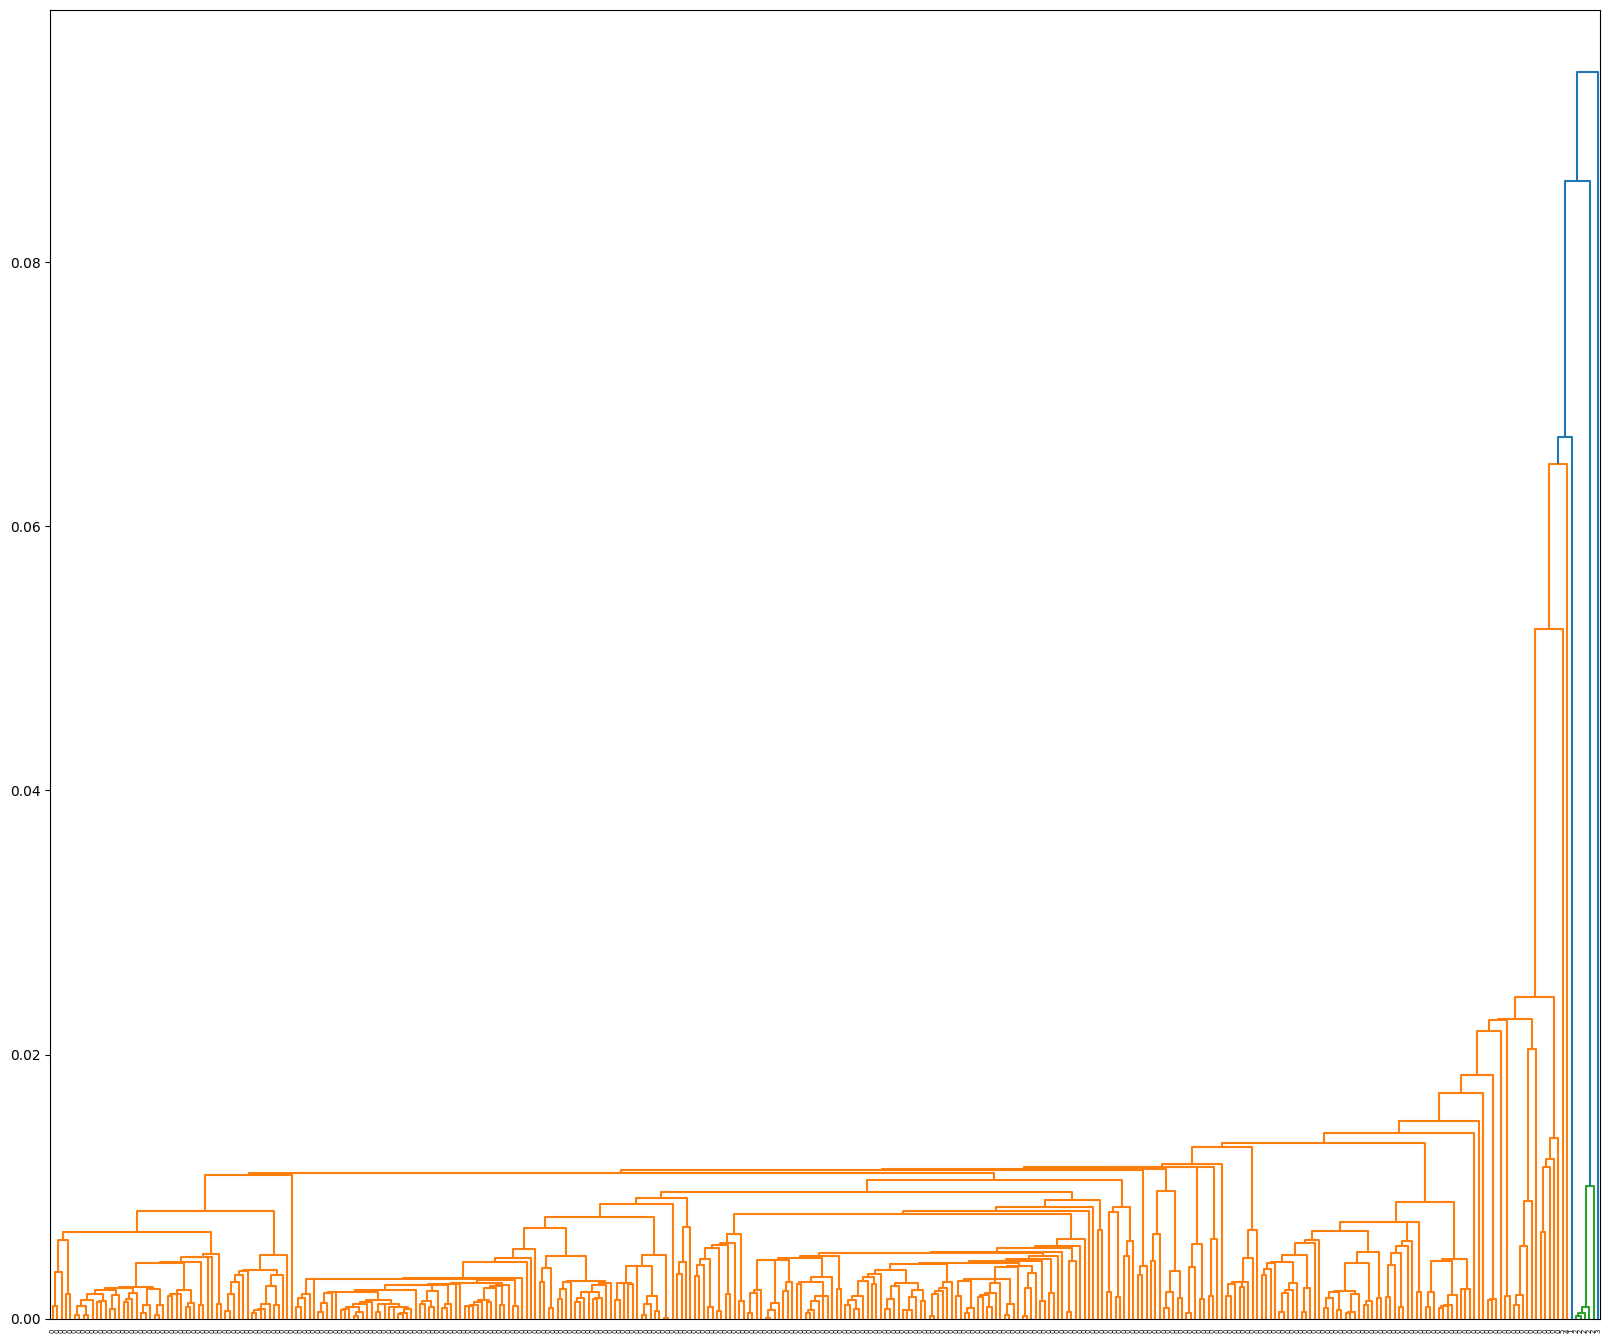

In [61]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# расссчитаем расстояния между кластерами
linked = linkage(df[["latitude", "longitude"]], 'single')

plt.figure(figsize=(20, 17))

# визуализируем дендрограмму с ориентацией top
# сначала будут отрисовываться кластеры с минимальным расстоянием между друг другом
dendrogram(Z=linked,
            orientation='top',
            labels=predictions_ag_model,
            distance_sort='descending')

plt.show()

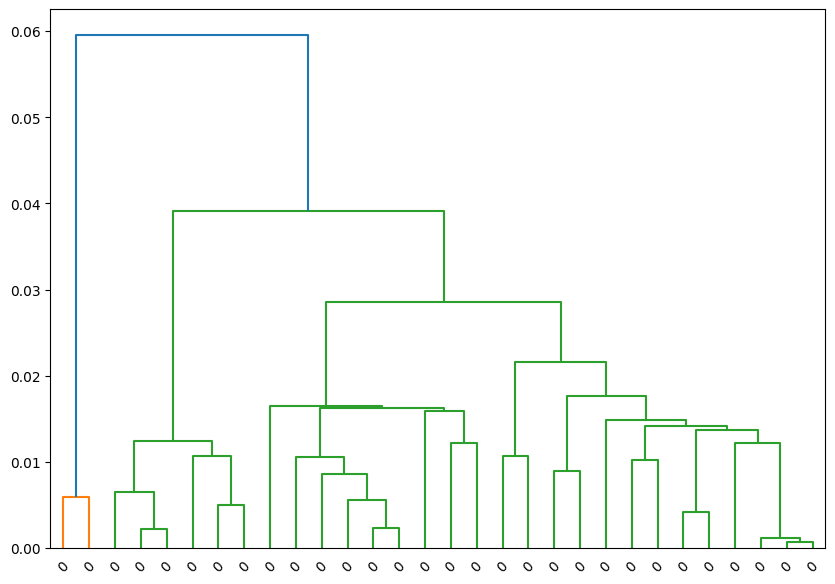

In [62]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt


linked = linkage(df[:30][["latitude", "longitude"]], 'single')

plt.figure(figsize=(10, 7))

dendrogram(Z=linked,
            orientation='top',
            labels=predictions_ag_model[:30],
            distance_sort='ascending')

plt.show()

## Clustergram визуализация

Построение кластеров можно отследить только для иерархической кластеризации. Для k-means-кластеризации мы можем только визуализировать полученные кластеры. Однако иногда бывает интересно представить, как выглядели бы данные, если бы кластеров было, например, два, а не три.

Относительно недавно был разработан ещё один способ визуализации — Clustergram.

Данная визуализация позволяет понять, что происходит с данными при разном количестве кластеров, и полезна при исследовательском анализе. Также она может быть полезна и для иерархической кластеризации, когда объектов много и дендрограмма получается сложной для понимания.

[Почитать](https://github.com/martinfleis/clustergram)

Графики Clustergram позволяют отследить, как делятся данные при разном количестве кластеров. Более того, можно оценить, в каком кластере объектов больше, а в каком — меньше.

K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.08400201797485352 seconds.
K=3 fitted in 0.0775749683380127 seconds.


d:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

d:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

d:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



K=4 fitted in 0.07974696159362793 seconds.
K=5 fitted in 0.09539413452148438 seconds.
K=6 fitted in 0.08752083778381348 seconds.


d:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

d:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

d:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



K=7 fitted in 0.09251046180725098 seconds.
K=8 fitted in 0.09651994705200195 seconds.


d:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



<AxesSubplot: xlabel='Number of clusters (k)', ylabel='PCA weighted mean of the clusters'>

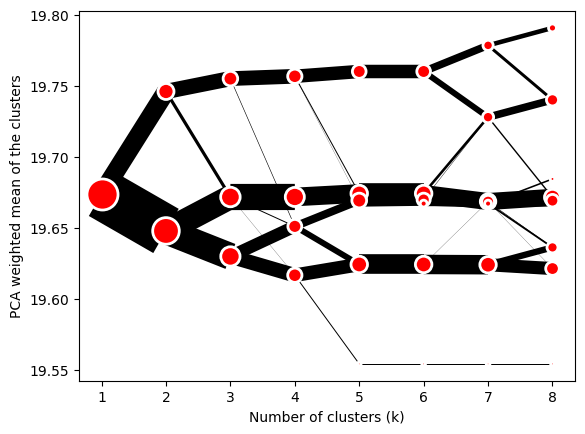

In [63]:
from clustergram import Clustergram

# задаем количество кластеров, для которого хотим получить визуализиацию
cgram = Clustergram(range(1, 9), method='kmeans')
# запускаем алгоритм
cgram.fit(df[["latitude", "longitude"]])
cgram.plot()

На данном графике мы можем наблюдать, как изменяются данные в ходе кластеризации. Сначала один кластер разделился на два. При этом эти кластеры неравномерные: в нижнем кластере данных существенно больше (так как нижняя линия значительно толще), чем в верхнем. Далее данные делятся на три кластера, при этом количество объектов в двух кластерах примерно одинаковое, а в третьем, верхнем, кластере объектов всё ещё меньше. Таким образом мы можем оценивать равномерность получившихся кластеров.

## 3D визуализация

Если кластеризация проводится не в двухмерном пространстве (по двум признакам), а в трёхмерном, для того, чтобы визуально оценить её результаты, необходимо проводить визуализацию в 3D-пространстве. В этом нам поможет библиотека Matplotlib или Plotly. 

Выше мы рассматривали кластеризацию в двухмерном пространстве и кластеризовали жильё в Нью-Йорке, представленное для аренды на Airbnb, основываясь на широте и долготе. Теперь давайте добавим третий признак — суточную стоимость аренды (поле price в датафрейме).

In [64]:
# инициализируем k-means кластеризацию с 6 кластерами
kmeans_clustering = KMeans(n_clusters=6)

# обучим k-means модель кластеризации на данных широты, долготы и цене, сохраним данные о кластерах для этих данных в kmeans_predictions
kmeans_predictions = kmeans_clustering.fit_predict(df[['latitude', 'longitude', 'price']])

# сохраним предсказания в колонку clusters датафрейма
df["clusters_3d"] = kmeans_predictions

d:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Text(0.5, 0, 'price')

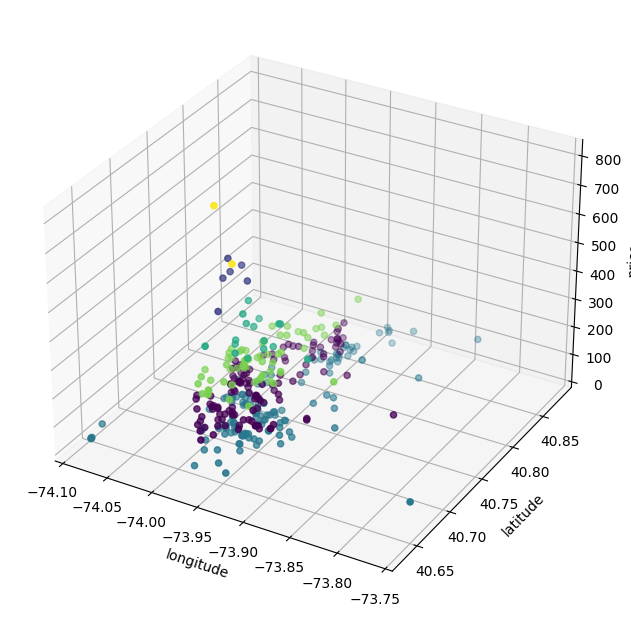

In [65]:
from mpl_toolkits.mplot3d import Axes3D

# создаем трехмерный объект
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
# добавитм дольнительную ось в объект картинки
fig.add_axes(ax)


# визуализируем данные, передав значения x, y, z, а также информацию о группировке данных по цветам
ax.scatter(df.longitude.to_list(), df.latitude.to_list(), df.price.to_list(), c=df.clusters_3d)
# добавим оси
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_zlabel('price')

Чтобы изменить угол обзора, существует два параметра:

* ax.azim — куб будет вращаться слева направо в зависимости от изменения этой величины;
* ax.elev — куб будет вращаться снизу вверх в зависимости от изменения данной величины.

Text(0.5, 0, 'price')

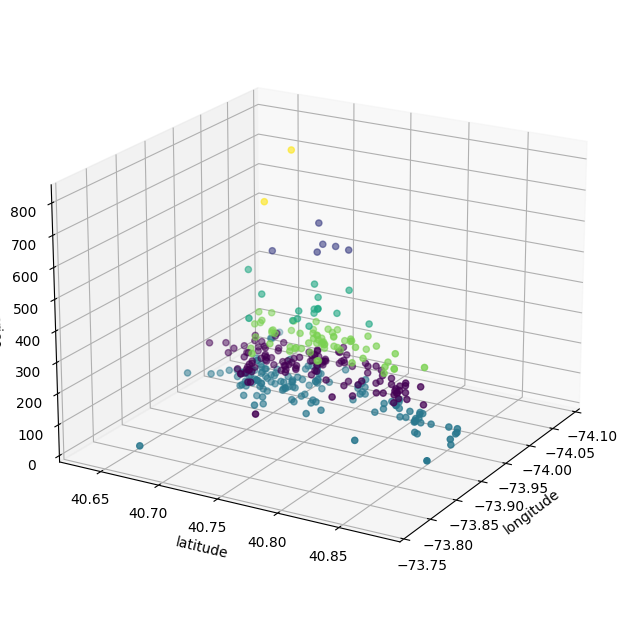

In [66]:
from mpl_toolkits.mplot3d import Axes3D

# создаем трехмерный объект
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
# добавитм дольнительную ось в объект картинки
fig.add_axes(ax)


ax.azim = 30
ax.elev = 20


# визуализируем данные, передав значения x, y, z, а также информацию о группировке данных по цветам
ax.scatter(df.longitude.to_list(), df.latitude.to_list(), df.price.to_list(), c=df.clusters_3d)
# добавим оси
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_zlabel('price')

Данные в трёхмерном пространстве образовали чёткие кластеры, и в основном они основываются на цене арендных квартир. Внизу мы видим фиолетовый кластер с самыми дешёвыми квартирами, а наверху — сиреневый и зелёный кластеры с самыми дорогими. При этом они, по всей видимости, располагаются в одном районе, так как значения широты и долготы довольно близкие.

Хоть мы и получили нужную информацию из предыдущей визуализации, но было не совсем удобно каждый раз задавать для 3D-графика параметры обзора. Было бы идеально сделать график интерактивным, чтобы один раз провести визуализацию, а затем самим поворачивать график, как нам удобно. В этом поможет Plotly:

In [67]:
import plotly
import plotly.express as px

fig = px.scatter_3d(
    data_frame=df, 
    x = 'longitude', 
    y = 'latitude', 
    z = 'price', 
    color='clusters_3d', 

    width=1000,
    height=700
)

fig.show()

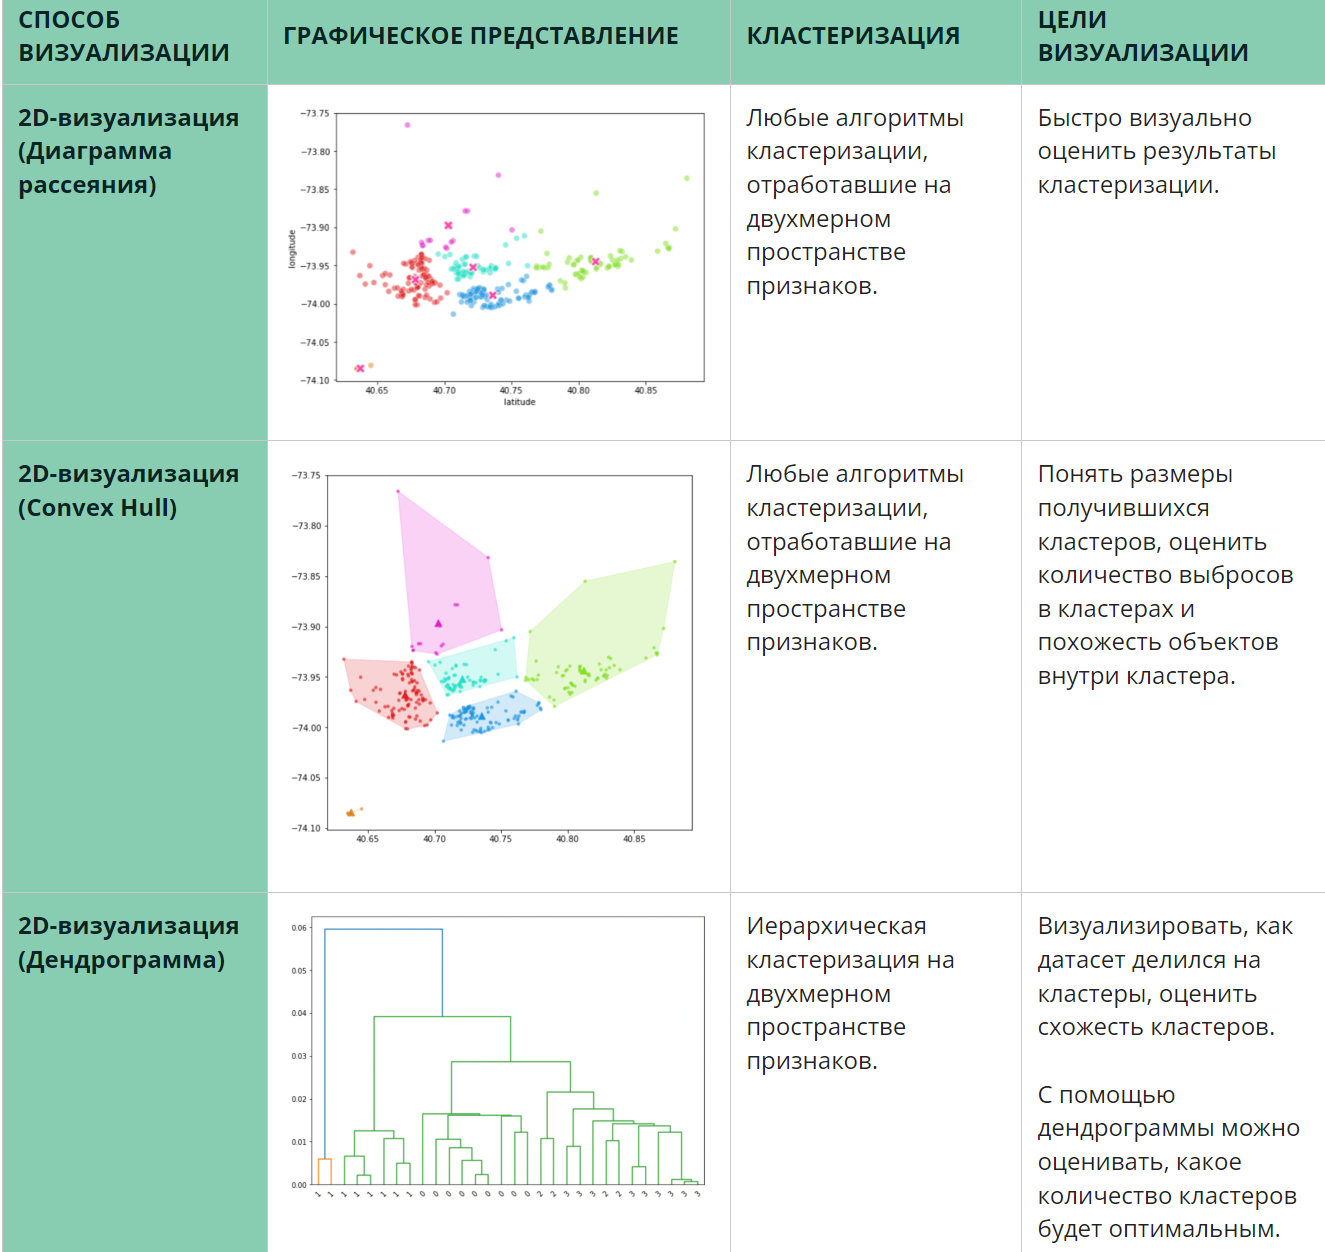
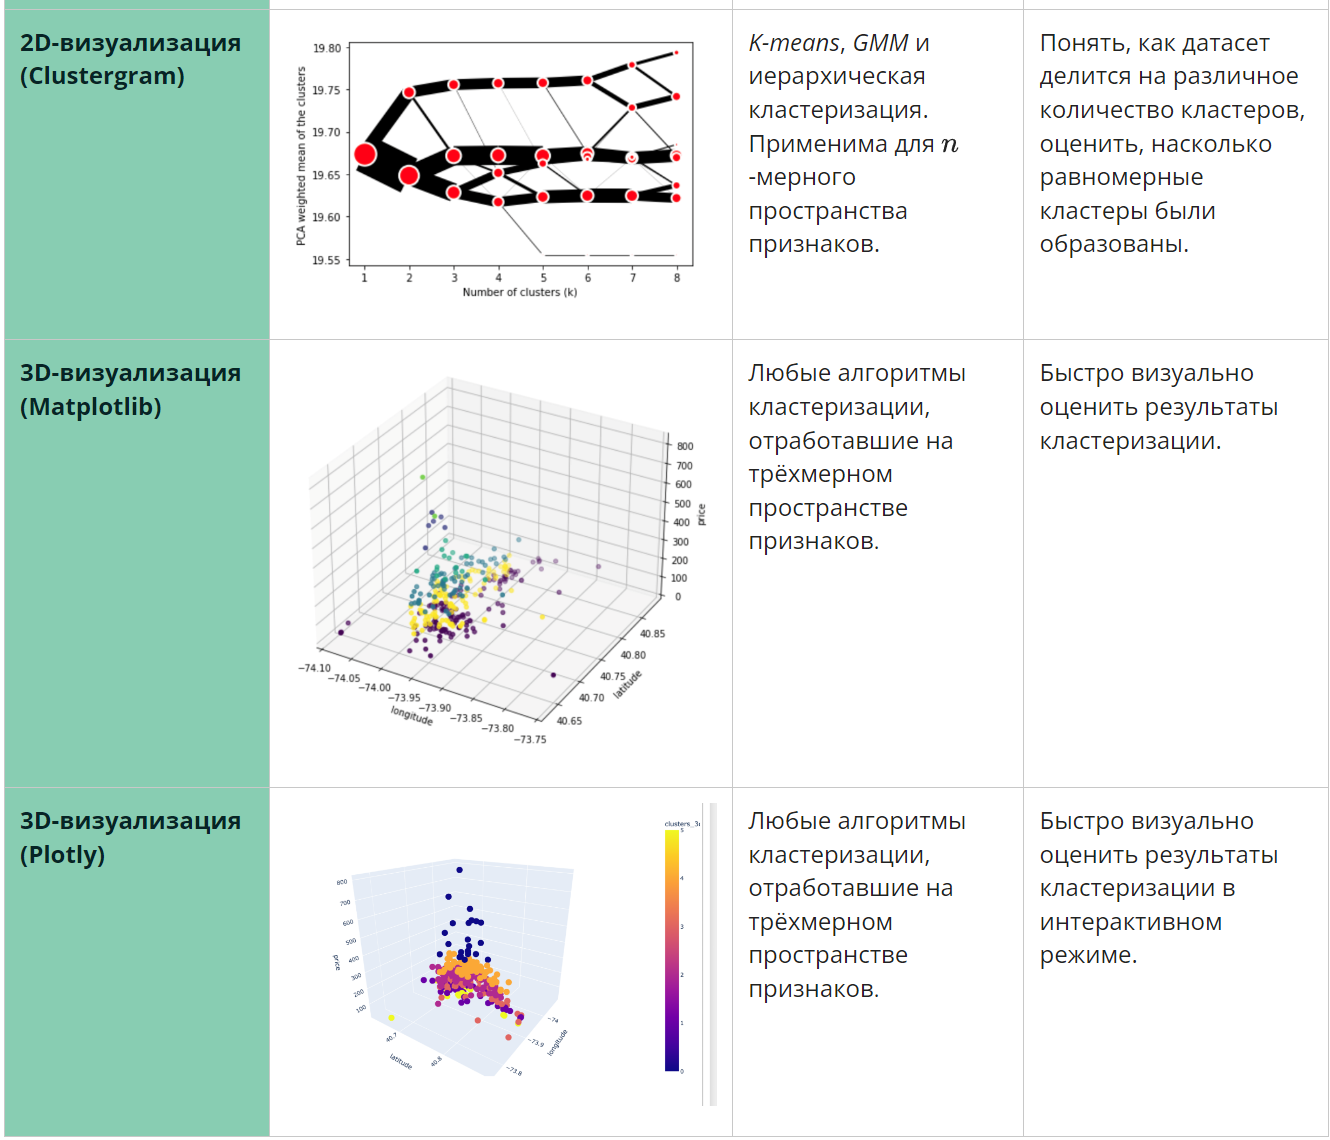

# Задания

8.4 Для датасета Airbnb проведите иерархическую агломеративную кластеризацию с использованием sklearn. В качестве признаков для кластеризации используйте latitude и longitude из датафрейма, количество кластеров для кластеризации — 6. Расстояние между кластерами рассчитайте методом полной связи, направление дендрограммы — top.

Визуализируйте дендрограмму для проведённой кластеризации. На сколько кластеров можно разделить датасет, если расстояние между кластерами будет равно 0.25?

In [75]:
# импортируем алгомеративную кластеризацию из sklearn
from sklearn.cluster import AgglomerativeClustering


# запускаем агломеративную кластеризацию
agglomerative_clustering = AgglomerativeClustering(n_clusters=6)

X = df[['latitude','longitude']]
# обучаем модель
agglomerative_clustering.fit(X)

# получаем метки c информацией, к какому кластеру относятся объекты
agglomerative_clustering.labels_

array([3, 0, 1, 3, 1, 0, 3, 0, 1, 0, 1, 0, 3, 1, 0, 2, 3, 0, 2, 1, 2, 3,
       3, 3, 2, 3, 1, 0, 1, 0, 1, 1, 2, 1, 3, 3, 2, 2, 3, 0, 0, 3, 3, 0,
       1, 3, 2, 3, 2, 3, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 3, 3, 0,
       3, 0, 2, 0, 1, 0, 0, 1, 3, 0, 0, 5, 3, 0, 2, 1, 0, 3, 0, 3, 2, 0,
       0, 2, 2, 3, 3, 3, 2, 2, 1, 1, 0, 2, 1, 3, 1, 0, 2, 3, 2, 2, 1, 3,
       0, 3, 0, 3, 0, 0, 2, 0, 0, 3, 1, 3, 0, 0, 3, 2, 0, 1, 3, 1, 3, 0,
       2, 0, 0, 0, 3, 3, 2, 3, 2, 2, 3, 5, 2, 2, 2, 0, 2, 3, 0, 3, 2, 3,
       1, 0, 2, 0, 3, 0, 2, 5, 2, 0, 0, 3, 1, 3, 3, 4, 2, 1, 2, 0, 3, 3,
       0, 1, 0, 1, 3, 5, 1, 2, 3, 2, 3, 0, 2, 0, 0, 0, 3, 0, 0, 0, 5, 0,
       2, 5, 5, 5, 2, 0, 1, 3, 1, 1, 1, 2, 2, 0, 0, 2, 3, 0, 2, 1, 5, 3,
       0, 0, 0, 0, 1, 1, 3, 0, 0, 5, 2, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 3, 0, 2, 4, 4, 4, 0, 0, 2, 2, 4, 5, 3, 3, 1, 1, 2, 0,
       3, 1, 2, 0, 2, 2, 2, 2, 0, 0, 0, 3, 2, 0, 2, 2, 1, 3, 3, 2, 0, 0,
       2, 1, 3, 3, 1, 2, 1, 1, 1, 2, 0, 3, 2, 0, 0,

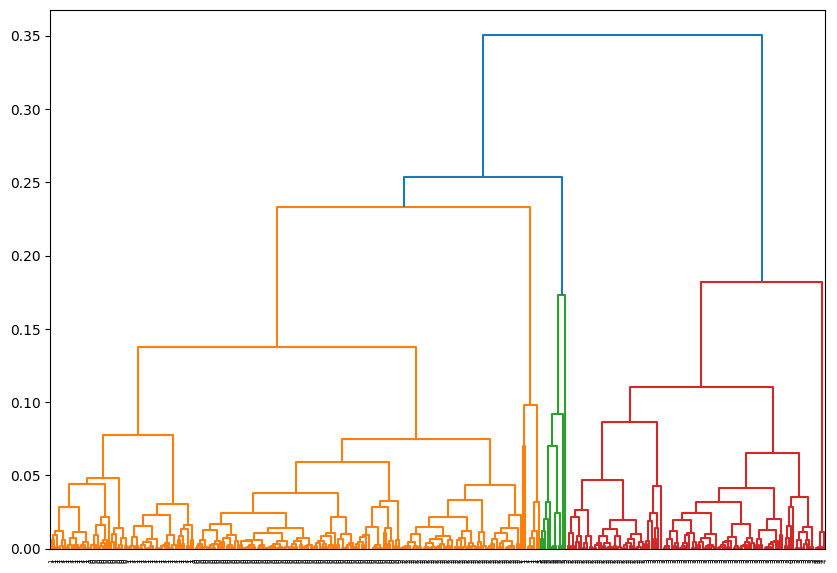

хуйня всё это


In [76]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'complete')


plt.figure(figsize=(10, 7))

dendrogram(linked,
            orientation='top',
            labels=agglomerative_clustering.labels_,
            distance_sort='descending',
            show_leaf_counts=True,
            )

plt.show()

print('хуйня всё это')

In [74]:
'''
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt

# запускаем агломеративную кластеризацию c подсчётом расстояния методом полной связи
agglomerative_clustering = AgglomerativeClustering(linkage='complete')
# обучаем модель
predictions_ag_model = agglomerative_clustering.fit_predict(df[['latitude', 'longitude']], )
# рассчитываем расстояния между кластерами с использованием метода полной связи
linked = linkage(df[["latitude", "longitude"]], 'complete')
plt.figure(figsize=(20, 17))

# визуализируем дендрограмму с ориентацией top
dendrogram(Z=linked,
            orientation='top',
            labels=predictions_ag_model,
            distance_sort='descending')

plt.show()
'''

'\nfrom scipy.cluster.hierarchy import dendrogram, linkage\nfrom sklearn.cluster import AgglomerativeClustering\nfrom matplotlib import pyplot as plt\n\n# запускаем агломеративную кластеризацию c подсчётом расстояния методом полной связи\nagglomerative_clustering = AgglomerativeClustering(linkage=\'complete\')\n# обучаем модель\npredictions_ag_model = agglomerative_clustering.fit_predict(df[[\'latitude\', \'longitude\']], )\n# рассчитываем расстояния между кластерами с использованием метода полной связи\nlinked = linkage(df[["latitude", "longitude"]], \'complete\')\nplt.figure(figsize=(20, 17))\n\n# визуализируем дендрограмму с ориентацией top\ndendrogram(Z=linked,\n            orientation=\'top\',\n            labels=predictions_ag_model,\n            distance_sort=\'descending\')\n\nplt.show()\n'

8.5 Для датасета Airbnb проведите DBSCAN-кластеризацию. В качестве признаков для кластеризации используйте latitude и longitude. Параметры для алгоритма кластеризации: eps=0.012, min_samples=6.

Визуализируйте результаты. Сколько кластеров получилось на графике?

<AxesSubplot: xlabel='latitude', ylabel='longitude'>

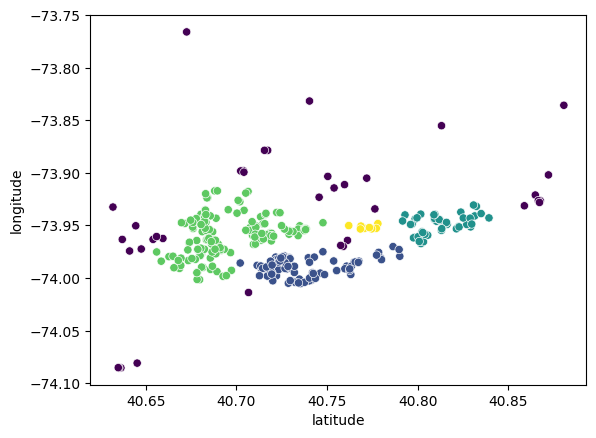

In [77]:
# импортируем DBSCAN кластеризацию
from sklearn.cluster import DBSCAN

#запускаем кластеризацию на наших данных
clustering = DBSCAN(eps=0.012, min_samples=6).fit(df[['latitude','longitude']])

# Далее можно визуализировать результаты, как мы делали с алгоритмом k-means
sns.scatterplot(x=df.latitude, y=df.longitude, c=clustering.labels_)